In [6]:
from sklearn import datasets, svm

iris=datasets.load_iris()
print(iris.data.shape)



(150, 4)


In [84]:
clf = svm.LinearSVC(C=1, max_iter=10000)

# обучение
clf.fit(iris.data, iris.target)

# прогнозирование для входных данных
result=clf.predict([[5.0, 3.6, 1.3, 0.25]])
print(clf.classes_)
print(result)

[0 1 2]
[0]


In [85]:
result=clf.predict([[ 15.0, 13.6, 10.3, 10.25]])
print(clf.classes_)
print(result)

[0 1 2]
[2]


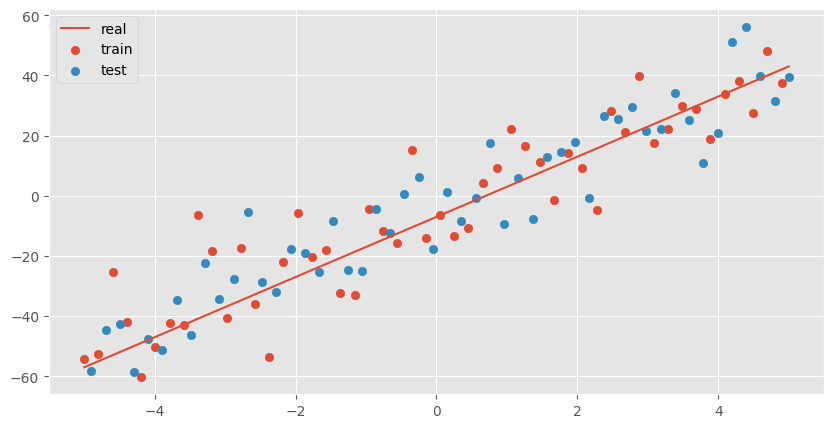

In [86]:
import numpy as np
from matplotlib import pyplot as plt

plt.style.use('ggplot')

n_points = 100
X = np.linspace(-5, 5, n_points)
y = 10 * X - 7
X_train = X[0::2].reshape(-1, 1)
y_train = y[0::2] + np.random.randn(int(n_points/2)) * 10
X_test = X[1::2].reshape(-1, 1)
y_test = y[1::2] + np.random.randn(int(n_points/2)) * 10

#визуализация данных
plt.figure(figsize=(10, 5))
plt.plot(X, y, label='real')
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.legend(loc='best')
plt.show()

In [87]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
w=reg.coef_
print(w)
b=reg.intercept_
print(b)
result=reg.predict([[3]])

[9.07126905]
-4.782800754070586


In [94]:
# Создание и обучение классификатора ближайшего соседа
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier()
knn.fit(iris.data, iris.target)

# Прогнозирование для входных данных
result = knn.predict([[0.1, 0.2, 0.3, 0.4]])
print(result)
result = knn.predict([[10.1, 10.2, 10.3, 10.4]])
print(result)

[0]
[2]


In [90]:
from sklearn import cluster, datasets

# задаем количество кластеров, равное 3
k = 3
k_means = cluster.KMeans(k, n_init=10)

# обучение
k_means.fit(iris.data)

# результат кластеризации
print(k_means.labels_[::10])
print(iris.target[::10])
result = k_means.predict([[15.0, 13.6, 11.3, 10.25], [5.0, 3.6, 1.3, 0.25]])
print(result)

[1 1 1 1 1 0 0 0 0 0 2 2 2 2 2]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]
[2 1]


In [91]:
from sklearn import metrics

# внутренняя метрика
print(metrics.silhouette_score(iris.data, k_means.labels_))

# внешняя метрика
print(metrics.adjusted_rand_score(iris.target, k_means.labels_))

0.5528190123564095
0.7302382722834697


---

## Дополнительное задание

In [127]:
import pandas as pd
df = pd.read_excel('trips_data_for_ML.xlsx', index_col=0)
df.head()

,salary,age,family_members,target,city_Екатеринбург,city_Киев,city_Краснодар,city_Минск,city_Москва,city_Новосибирск,...,city_Ярославль,vacation_preference_Архитектура,vacation_preference_Ночные клубы,vacation_preference_Пляжный отдых,vacation_preference_Шоппинг,transport_preference_Автомобиль,transport_preference_Космический корабль,transport_preference_Морской транспорт,transport_preference_Поезд,transport_preference_Самолет
0,196000,25,1,New York,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,152000,60,1,London,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,83000,49,2,Sydney,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,161000,41,0,New York,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,146000,58,1,Sydney,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [128]:
X = df.drop('target', axis=1)
y = df['target']

In [129]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier()

In [130]:
example = {
    'salary': [130000],
    'age': [31],
    'family_members': [0],
    'city_Екатеринбург': [0],
    'city_Киев': [0],
    'city_Краснодар': [1],
    'city_Минск': [0],
    'city_Москва': [0],
    'city_Новосибирск': [0],
    'city_Омск': [0],
    'city_Петербург': [0],
    'city_Томск': [0],
    'city_Хабаровск': [0],
    'city_Ярославль': [0],
    'vacation_preference_Архитектура': [0],
    'vacation_preference_Ночные клубы': [0],
    'vacation_preference_Пляжный отдых': [0],
    'vacation_preference_Шоппинг': [1],
    'transport_preference_Автомобиль': [1],
    'transport_preference_Космический корабль': [0],
    'transport_preference_Морской транспорт': [0],
    'transport_preference_Поезд': [0],
    'transport_preference_Самолет': [0]
}

In [131]:
example_df = pd.DataFrame(example)
model.predict(example_df)

array(['New York'], dtype=object)

In [132]:
import pickle

# сохранение модели в строке
s = pickle.dumps(model)
model_new = pickle.loads(s)
model_new.predict(example_df)

# сохранение модели в файле
import joblib
joblib.dump(model, 'filename.pkl')

# загрузка модели
model_new = joblib.load('filename.pkl')

---

## Дополнительное задание

In [133]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

In [134]:
df = pd.read_csv('parkinsons.csv', index_col=0)
df.head(10)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,0.140,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,0.134,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,0.191,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571


In [135]:
X = df.drop('status', axis=1)
y = df['status']

scaler = MinMaxScaler((-1,1))
X = scaler.fit_transform(X)

x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=7)

In [139]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [140]:
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

94.87179487179486


In [141]:
cv_scores = cross_val_score(model, x, y, cv=5)
print('Cross-validation scores:', cv_scores)
print('Mean cross-validation score:', cv_scores.mean())

Cross-validation scores: [0.76923077 0.82051282 0.84615385 0.76923077 0.74358974]
Mean cross-validation score: 0.7897435897435898
